# Assignment 1
## Dataset: titanic.xlsx

In [30]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, math

# Fetch the data and take a peek what's inside
df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/titanic.xlsx')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Basic demographics

array([[<AxesSubplot:title={'center':'(female, 0)'}>,
        <AxesSubplot:title={'center':'(female, 1)'}>],
       [<AxesSubplot:title={'center':'(male, 0)'}>,
        <AxesSubplot:title={'center':'(male, 1)'}>]], dtype=object)

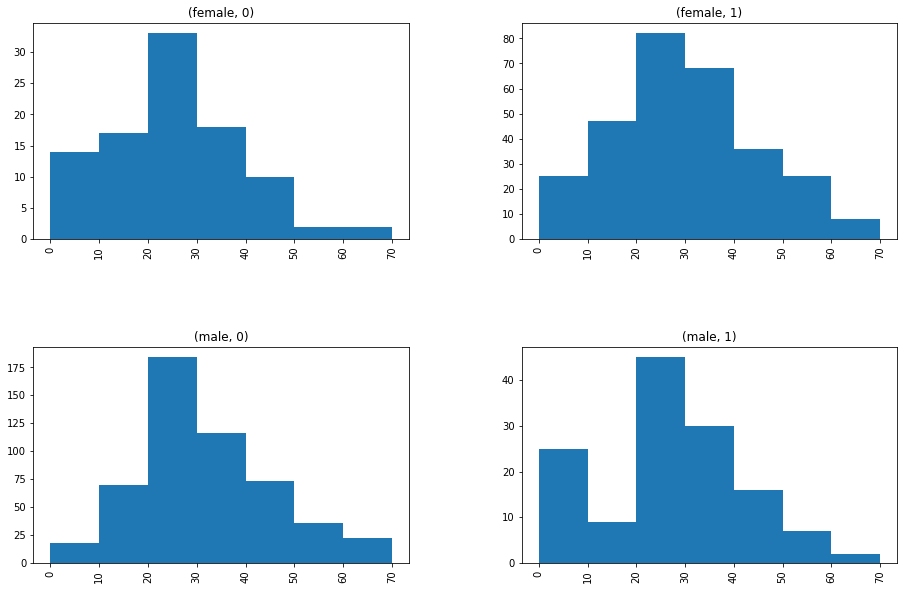

In [72]:
# Lets plot ages over sex and whether one has survived 

df.hist(column='age', by=['sex','survived'], bins = range(0,80,10), figsize=[15,10])